# San Francisco Crime Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
data = pd.read_csv('E:/PCPS/crime-analytics-web-application-master/train.csv')
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Visualization and analysis

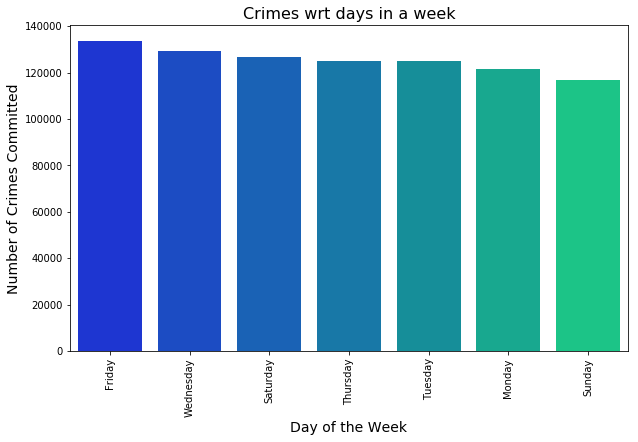

In [2]:
crimeday=data['DayOfWeek'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(crimeday.index, crimeday.values,palette='winter')
plt.xticks(rotation='vertical')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Crimes Committed', fontsize=14)
plt.title("Crimes wrt days in a week", fontsize=16)
plt.show()

## Friday seems be the day when most crimes are committed

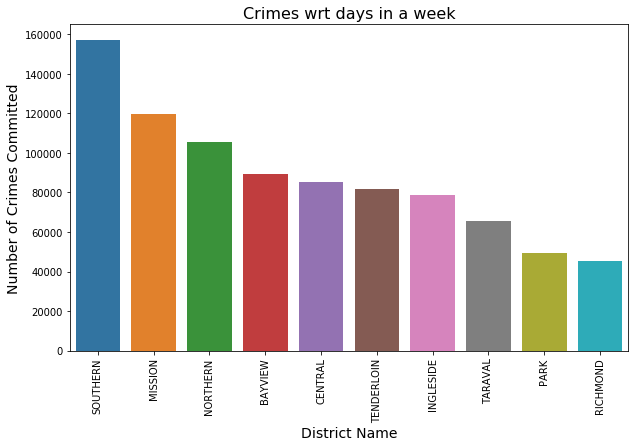

In [3]:
district=data['PdDistrict'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(district.index, district.values,)
plt.xticks(rotation='vertical')
plt.xlabel('District Name', fontsize=14)
plt.ylabel('Number of Crimes Committed', fontsize=14)
plt.title("Crimes wrt days in a week", fontsize=16)
plt.show()

## Southern district seems to have the highest crime rate

## Prediction and Probabilities

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import numpy as np 
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
 
train=pd.read_csv('E:/PCPS/crime-analytics-web-application-master/train.csv', parse_dates = ['Dates'])
test=pd.read_csv('E:/PCPS/crime-analytics-web-application-master/test.csv', parse_dates = ['Dates'])

In [5]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Convert labels into numbers

In [ ]:
#Convert crime labels to numbers
le_crime = preprocessing.LabelEncoder()
crime = le_crime.fit_transform(train.Category)

#Get binarized weekdays, districts, and hours.
days = pd.get_dummies(train.DayOfWeek)
district = pd.get_dummies(train.PdDistrict)
hour = train.Dates.dt.hour
hour = pd.get_dummies(hour) 

#Build new array
train_data = pd.concat([hour, days, district], axis=1)
train_data['crime']=crime

#Repeat for test data
days = pd.get_dummies(test.DayOfWeek)
district = pd.get_dummies(test.PdDistrict)
 
hour = test.Dates.dt.hour
hour = pd.get_dummies(hour) 
 
test_data = pd.concat([hour, days, district], axis=1)
 
training, validation = train_test_split(train_data, train_size=.60)

### Days of the week represented in binary

In [7]:
days.head(1)

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0


### Hours in binary

In [8]:
#Hours of the day in binary
hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
 'Wednesday', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION',
 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']

 #Create a validation training set for testing   
training, validation = train_test_split(train_data, train_size=.60)
model = BernoulliNB()
model.fit(training[features], training['crime'])
predicted = np.array(model.predict_proba(validation[features]))
log_loss(validation['crime'], predicted) 
#Logistic Regression for comparison
model = LogisticRegression(C=.01)
model.fit(training[features], training['crime'])
predicted = np.array(model.predict_proba(validation[features]))
log_loss(validation['crime'], predicted)

2.6222426998465718

In [10]:
# Train final model of whole training dataset
model = BernoulliNB()
model.fit(train_data[features], train_data['crime'])
predicted = model.predict_proba(test_data[features])

In [11]:
#results
result=pd.DataFrame(predicted, columns=le_crime.classes_)


In [12]:
result.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.005451,0.136201,0.000127,0.000711,0.037038,0.002288,0.003024,0.038701,0.003837,0.000713,...,0.000197,0.004098,0.000395,0.042298,0.000007,0.006365,0.068189,0.087251,0.043807,0.019875
1,0.005451,0.136201,0.000127,0.000711,0.037038,0.002288,0.003024,0.038701,0.003837,0.000713,...,0.000197,0.004098,0.000395,0.042298,0.000007,0.006365,0.068189,0.087251,0.043807,0.019875
2,0.001434,0.094518,0.000178,0.000171,0.049296,0.004202,0.003837,0.032659,0.005038,0.000807,...,0.000065,0.006550,0.000635,0.029117,0.000002,0.006709,0.057947,0.062714,0.039502,0.007129
3,0.002421,0.131360,0.000136,0.000755,0.035027,0.002009,0.004002,0.022246,0.003368,0.000621,...,0.000224,0.004022,0.000829,0.037946,0.000001,0.004583,0.077765,0.127807,0.027799,0.014417
4,0.002421,0.131360,0.000136,0.000755,0.035027,0.002009,0.004002,0.022246,0.003368,0.000621,...,0.000224,0.004022,0.000829,0.037946,0.000001,0.004583,0.077765,0.127807,0.027799,0.014417


In [27]:
## Save the model for later use
import pickle

filename = 'prediction.sav'
pickle.dump(model, open(filename, 'wb'))

In [26]:
model = pickle.load(open(filename, 'rb'))

In [20]:
## Do the prediction in for a single instance
p = [0] * 17
day = 'Sunday'
place = 'BAYVIEW'
if day == 'Friday':
    p[0]= 1
if day == 'Monday':
    p[1]= 1
if day == 'Saturday':
    p[2]= 1
if day == 'Sunday':
    p[3]= 1
if day == 'Thursday':
    p[4]= 1
if day == 'Tuesday':
    p[5]= 1
if day == 'Wednesday':
    p[6]= 1
if place == 'BAYVIEW':
    p[7] = 1
if place == 'CENTRAL':
    p[8] = 1
if place == 'INGLESIDE':
    p[9] = 1
if place == 'MISSION':
    p[10] = 1
if place == 'NORTHERN':
    p[11] = 1
if place == 'PARK':
    p[12] = 1
if place == 'RICHMOND':
    p[13] = 1 

In [29]:
array = model.predict_proba(p)
                            

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
print ("Probability of Arson: ",(array[0][0])* 100, "%")

NameError: name 'array' is not defined